In [14]:
import h5py
import numpy as np
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

In [3]:
train_data_PATH = 'D:/ISIC 2024 - Skin Cancer Detection with 3D-TBP/Data/train-image.hdf5'
test_data_PATH = 'D:/ISIC 2024 - Skin Cancer Detection with 3D-TBP/Data/test-image.hdf5'

In [10]:
def print_hdf5_structure(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")
        print(f"  Shape: {obj.shape}")
        print(f"  Type: {obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"Group: {name}")

with h5py.File(test_data_PATH, 'r') as f:
    print("HDF5 file structure:")
    f.visititems(print_hdf5_structure)

HDF5 file structure:
Dataset: ISIC_0015657
  Shape: ()
  Type: |S3318
Dataset: ISIC_0015729
  Shape: ()
  Type: |S2102
Dataset: ISIC_0015740
  Shape: ()
  Type: |S3171


In [21]:
with h5py.File(test_data_PATH, 'r') as file:
    keys = list(file.keys())
    first_key = keys[0]
    data = file[first_key][()]
    print(f"Type of data: {type(data)}")
    print(f"Shape of data: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"First few bytes: {data[:20]}")

Type of data: <class 'numpy.bytes_'>
Shape of data: ()
Data type: |S3318
First few bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'


In [27]:
class ISIC_HDF5Dataset(Dataset):
    def __init__(self, file_path, transform=None):
        self.file_path = file_path
        self.transform = transform
        
        with h5py.File(self.file_path, 'r') as file:
            self.keys = list(file.keys())
    
    def __getitem__(self, index):
        with h5py.File(self.file_path, 'r') as file:
            jpeg_data = file[self.keys[index]][()]
            image = Image.open(io.BytesIO(jpeg_data))
            image = np.array(image)
        
        # Normalize image
        image = image.astype(np.float32) / 255.0
        
        # Convert to PyTorch tensor
        image = torch.from_numpy(image).permute(2, 0, 1)  # Change from HWC to CHW format
        
        if self.transform:
            image = self.transform(image)
        
        # For now, we don't have labels, so return 0 as a placeholder
        return image, 0
    
    def __len__(self):
        return len(self.keys)

# Function to display a grid of images

In [31]:
def display_image_grid(dataset, num_images=3, figsize=(15, 15)):
    rows = int(np.sqrt(num_images))
    cols = int(np.ceil(num_images / rows))
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image, _ = dataset[i]
            ax.imshow(image.permute(1, 2, 0))  # Change back to HWC for display
            ax.axis('off')
        else:
            ax.remove()
    
    plt.tight_layout()
    plt.show()

Number of images: 3


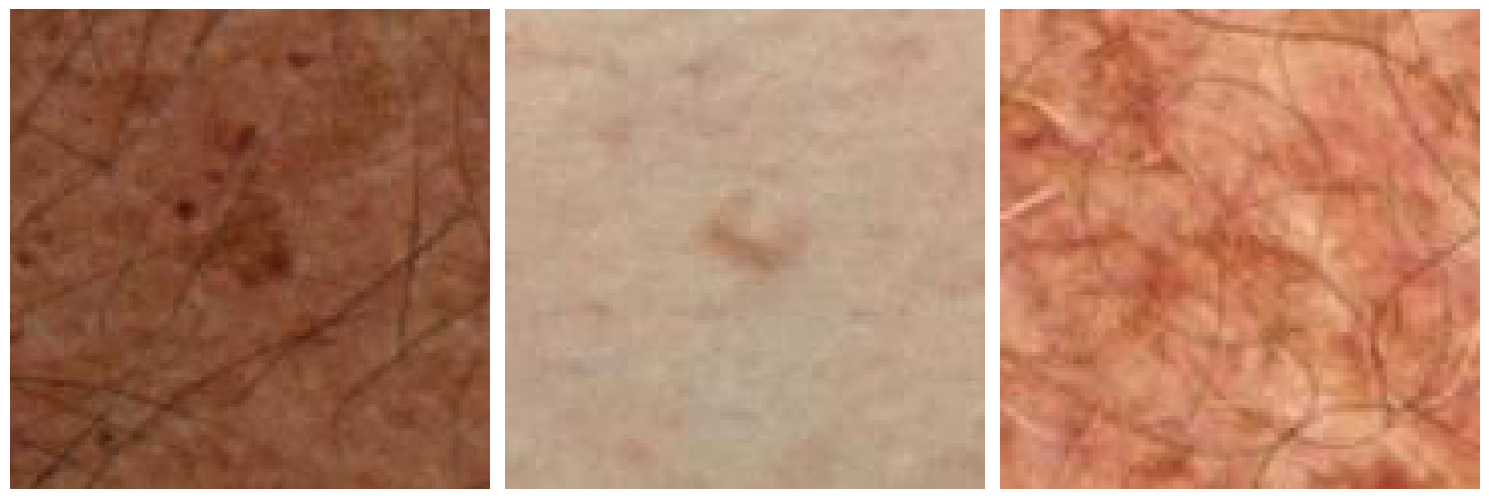

In [32]:
test_dataset = ISIC_HDF5Dataset(test_data_PATH)
print(f"Number of images: {len(test_dataset)}")
display_image_grid(test_dataset)

In [33]:
first_image, _ = test_dataset[0]
print(f"Image shape: {first_image.shape}")
print(f"Data type: {first_image.dtype}")

Image shape: torch.Size([3, 141, 141])
Data type: torch.float32


Number of images: 401059


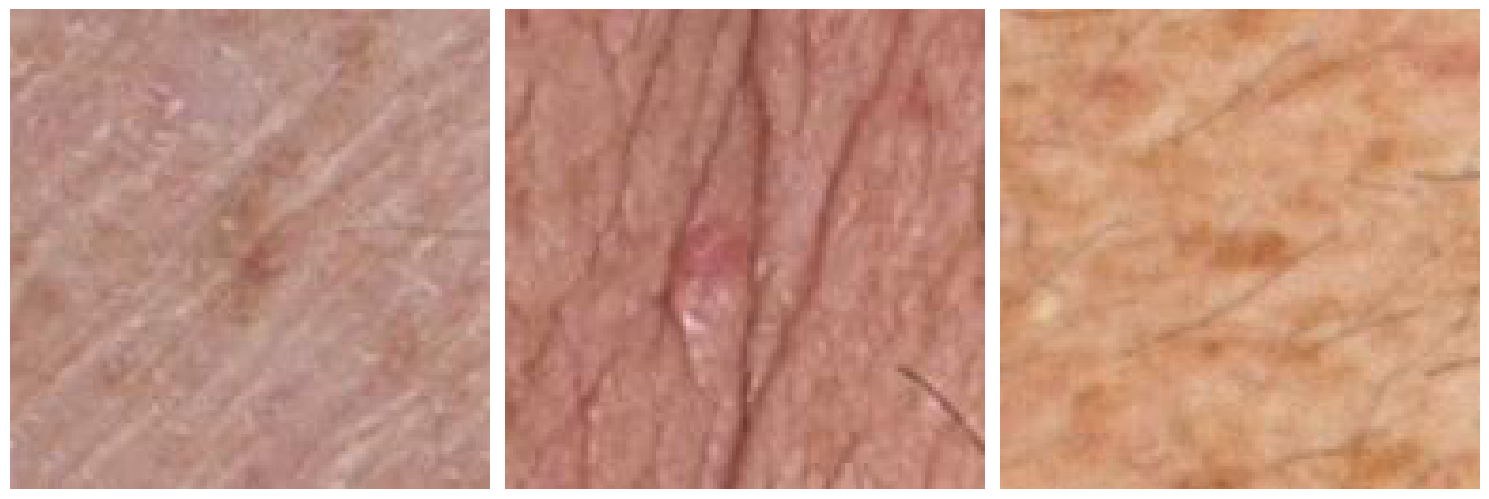

In [34]:
train_dataset = ISIC_HDF5Dataset(train_data_PATH)
print(f"Number of images: {len(train_dataset)}")
display_image_grid(train_dataset)

In [35]:
with h5py.File(train_data_PATH, 'r') as f:
    print("HDF5 file structure:")
    f.visititems(print_hdf5_structure)

HDF5 file structure:
Dataset: ISIC_0015670
  Shape: ()
  Type: |S3325
Dataset: ISIC_0015845
  Shape: ()
  Type: |S2996
Dataset: ISIC_0015864
  Shape: ()
  Type: |S3566
Dataset: ISIC_0015902
  Shape: ()
  Type: |S1998
Dataset: ISIC_0024200
  Shape: ()
  Type: |S2969
Dataset: ISIC_0035502
  Shape: ()
  Type: |S2360
Dataset: ISIC_0051648
  Shape: ()
  Type: |S2205
Dataset: ISIC_0051665
  Shape: ()
  Type: |S3241
Dataset: ISIC_0051710
  Shape: ()
  Type: |S2124
Dataset: ISIC_0051758
  Shape: ()
  Type: |S2059
Dataset: ISIC_0051812
  Shape: ()
  Type: |S3701
Dataset: ISIC_0051822
  Shape: ()
  Type: |S3709
Dataset: ISIC_0051896
  Shape: ()
  Type: |S2184
Dataset: ISIC_0051897
  Shape: ()
  Type: |S3864
Dataset: ISIC_0051958
  Shape: ()
  Type: |S2585
Dataset: ISIC_0051983
  Shape: ()
  Type: |S1951
Dataset: ISIC_0052003
  Shape: ()
  Type: |S3079
Dataset: ISIC_0052004
  Shape: ()
  Type: |S4090
Dataset: ISIC_0052026
  Shape: ()
  Type: |S2557
Dataset: ISIC_0052042
  Shape: ()
  Type: |S2164

KeyboardInterrupt: 

In [36]:
with h5py.File(train_data_PATH, 'r') as file:
    keys = list(file.keys())
    first_key = keys[0]
    data = file[first_key][()]
    print(f"Type of data: {type(data)}")
    print(f"Shape of data: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"First few bytes: {data[:20]}")

Type of data: <class 'numpy.bytes_'>
Shape of data: ()
Data type: |S3325
First few bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'


In [37]:
with h5py.File(train_data_PATH, 'r') as file:
    keys = list(file.keys())

In [38]:
keys

['ISIC_0015670',
 'ISIC_0015845',
 'ISIC_0015864',
 'ISIC_0015902',
 'ISIC_0024200',
 'ISIC_0035502',
 'ISIC_0051648',
 'ISIC_0051665',
 'ISIC_0051710',
 'ISIC_0051758',
 'ISIC_0051812',
 'ISIC_0051822',
 'ISIC_0051896',
 'ISIC_0051897',
 'ISIC_0051958',
 'ISIC_0051983',
 'ISIC_0052003',
 'ISIC_0052004',
 'ISIC_0052026',
 'ISIC_0052042',
 'ISIC_0052068',
 'ISIC_0052094',
 'ISIC_0052109',
 'ISIC_0052122',
 'ISIC_0052164',
 'ISIC_0052205',
 'ISIC_0052213',
 'ISIC_0052220',
 'ISIC_0052231',
 'ISIC_0052241',
 'ISIC_0052259',
 'ISIC_0052270',
 'ISIC_0052310',
 'ISIC_0052313',
 'ISIC_0052328',
 'ISIC_0052332',
 'ISIC_0052355',
 'ISIC_0052357',
 'ISIC_0052367',
 'ISIC_0061318',
 'ISIC_0062556',
 'ISIC_0065755',
 'ISIC_0067881',
 'ISIC_0068212',
 'ISIC_0070972',
 'ISIC_0071851',
 'ISIC_0071852',
 'ISIC_0073261',
 'ISIC_0073270',
 'ISIC_0073301',
 'ISIC_0073316',
 'ISIC_0073364',
 'ISIC_0073396',
 'ISIC_0073412',
 'ISIC_0073426',
 'ISIC_0073467',
 'ISIC_0073505',
 'ISIC_0073511',
 'ISIC_0073521